# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

import joblib

# Load Data

In [2]:
url = "https://raw.githubusercontent.com/pararawendy/dibimbing-materials/refs/heads/main/boston.csv"
df = pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
df['crim'].max()

88.9762

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


| Feature     | Description                                      |
|-----------|----------------------------------------------------|
| `crim`    |Crime rate per capita                               |
| `zn`      |Proportion of land used for housing                 |
| `indus`   |Proportion of non-retail areas per city             |
| `chas`    |Does the house border the Charles River?            |
| `nox`     |Nitrogen oxide concentration                        |
| `rm`      |Average number of rooms per house                   |
| `age`     |Proportion of old houses                            |
| `dis`     |Distance to major business centers                  |
| `rad`     |Accessibility index to toll roads                   |
| `tax`     |Property tax rates                                  |
| `ptratio` |Student to teacher ratio                            |
| `black`   |Proportion of black population                      |
| `lstat`   |Percentage of population with low economic status   |
| `medv`    | **(Target)** Median home price (in $1000)          |


In [4]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [5]:
df.duplicated().sum()

np.int64(0)

In the Boston Housing dataset, there are 13 independent variables (features) that can be used to predict the target variable, namely medv (Median house price (in $1000))<br><br>

Furthermore, each feature has a logical and practical relationship with the price of the house. For example:

* rm: Houses with more rooms are generally more expensive.

* lstat: Areas with low social status residents tend to have lower house prices.

* nox, crim: Pollution and high crime rates tend to reduce buying interest.

* dis, rad: Accessibility to the city center or highways can increase house prices.

* ptratio: Quality education (good student-teacher ratio) usually attracts buyers.

# Data preparation

In [6]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='medv')
target = df[['medv']]

# First splitting: pretrain and test
feature_pretrain, feature_test, target_pretrain, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_train, feature_validation, target_train, target_validation = train_test_split(feature_pretrain, target_pretrain, test_size=0.20, random_state=42)

In [7]:
feature_train.shape

(323, 13)

In [8]:
feature_train.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,323.0,3.491326,8.572041,0.00906,0.080415,0.26938,2.684725,88.9762
zn,323.0,11.569659,23.573177,0.00000,0.000000,0.00000,15.000000,100.0000
indus,323.0,11.086409,6.968780,0.74000,5.160000,8.56000,18.100000,27.7400
chas,323.0,0.074303,0.262671,0.00000,0.000000,0.00000,0.000000,1.0000
nox,323.0,0.557080,0.118448,0.38500,0.448500,0.53800,0.631000,0.8710
rm,323.0,6.318282,0.732472,3.86300,5.888000,6.20900,6.630500,8.7800
age,323.0,68.854180,27.971904,2.90000,46.950000,78.10000,93.950000,100.0000
dis,323.0,3.776294,2.129372,1.12960,2.031250,3.11210,5.344000,10.7103
rad,323.0,9.077399,8.493159,1.00000,4.000000,5.00000,8.000000,24.0000
tax,323.0,400.792570,164.342310,188.00000,279.000000,329.00000,453.000000,711.0000


In [9]:
print(feature_train.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64


In [10]:
feature_test.shape

(102, 13)

In [11]:
feature_test.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,102.0,3.630947,7.459607,0.00632,0.087368,0.209885,4.522472,45.7461
zn,102.0,10.549020,24.083242,0.00000,0.000000,0.000000,0.000000,95.0000
indus,102.0,11.737745,6.722576,0.46000,6.102500,10.590000,18.100000,27.7400
chas,102.0,0.058824,0.236456,0.00000,0.000000,0.000000,0.000000,1.0000
nox,102.0,0.547609,0.108602,0.39200,0.448250,0.532000,0.621500,0.8710
rm,102.0,6.160833,0.663825,3.56100,5.870250,6.170500,6.479250,8.0340
age,102.0,68.648039,28.890866,6.20000,43.800000,74.700000,95.225000,100.0000
dis,102.0,3.742949,2.010749,1.16910,2.263950,3.353400,4.764825,10.7103
rad,102.0,10.313725,9.161889,1.00000,4.000000,5.000000,24.000000,24.0000
tax,102.0,424.892157,177.462472,188.00000,281.750000,345.000000,666.000000,711.0000


In [12]:
print(feature_test.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64


In [13]:
feature_validation.shape

(81, 13)

In [14]:
feature_validation.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,81.0,4.078865,10.037484,0.01301,0.08199,0.22927,4.26131,67.9208
zn,81.0,11.567901,21.531772,0.00000,0.00000,0.00000,20.00000,90.0000
indus,81.0,10.580864,6.617006,1.52000,4.39000,8.56000,18.10000,21.8900
chas,81.0,0.061728,0.242161,0.00000,0.00000,0.00000,0.00000,1.0000
nox,81.0,0.554109,0.115386,0.40000,0.45800,0.52400,0.62400,0.8710
rm,81.0,6.306358,0.613102,4.36800,5.92800,6.31500,6.72800,7.6450
age,81.0,67.369136,28.229633,6.60000,42.10000,75.00000,92.60000,100.0000
dis,81.0,3.935404,2.147139,1.33250,2.26250,3.41060,5.49170,12.1265
rad,81.0,10.469136,8.931806,1.00000,4.00000,5.00000,24.00000,24.0000
tax,81.0,416.950617,173.730028,187.00000,284.00000,370.00000,666.00000,666.0000


In [15]:
print(feature_validation.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
dtype: int64


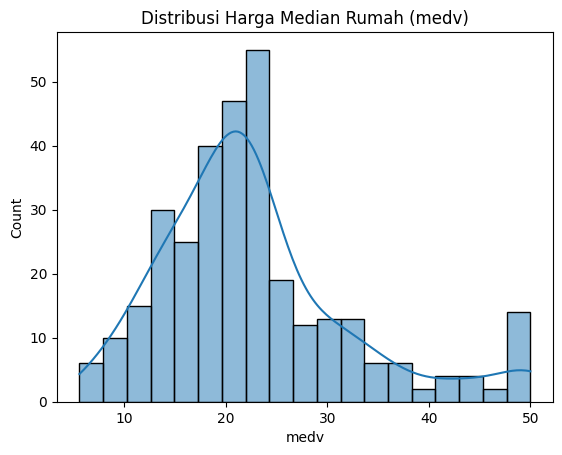

In [16]:
# Target Distribution

sns.histplot(target_train['medv'], kde=True)
plt.title("Distribusi Harga Median Rumah (medv)")
plt.show()

# Correlation Analysis and Feature Selection

In [17]:
# calculate VIF scores

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.750939
2,zn,2.473421
3,indus,3.741988
4,chas,1.110042
5,nox,4.585650
6,rm,1.972174
7,age,3.127443
8,dis,4.390458
9,rad,7.182410
10,tax,8.268145


* VIF == 1 → No multicollinearity
* VIF between 4 and 10 → Moderate multicollinearity
* VIF > 10 →  Severe multicollinearity

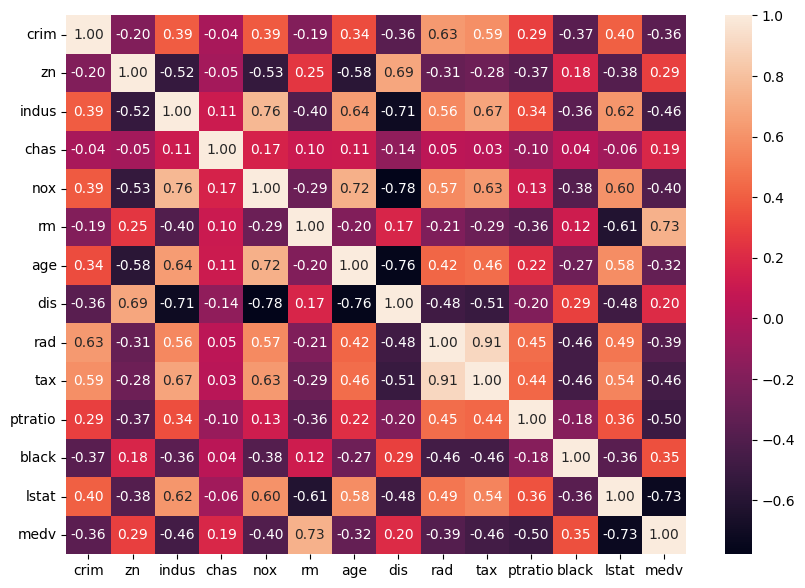

In [18]:
# heatmap correlation
df_train = pd.concat([feature_train, target_train], axis=1)
corr = df_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [19]:
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.195668,0.389857,-0.035858,0.388122,-0.189781,0.337049,-0.363448,0.631798,0.587809,0.286043,-0.367397,0.403489,-0.359774
zn,-0.195668,1.000000,-0.521662,-0.054003,-0.528464,0.254074,-0.583028,0.686646,-0.306831,-0.278743,-0.365019,0.178697,-0.382375,0.289367
indus,0.389857,-0.521662,1.000000,0.114021,0.760305,-0.396490,0.640536,-0.710553,0.556328,0.674758,0.342034,-0.360559,0.616812,-0.460185
chas,-0.035858,-0.054003,0.114021,1.000000,0.165405,0.104342,0.111333,-0.136743,0.046137,0.027768,-0.101159,0.040913,-0.063594,0.185840
nox,0.388122,-0.528464,0.760305,0.165405,1.000000,-0.286632,0.724011,-0.778145,0.568744,0.628824,0.125814,-0.383760,0.600718,-0.396864
rm,-0.189781,0.254074,-0.396490,0.104342,-0.286632,1.000000,-0.199605,0.174687,-0.206981,-0.287449,-0.356001,0.120647,-0.612856,0.733649
age,0.337049,-0.583028,0.640536,0.111333,0.724011,-0.199605,1.000000,-0.760111,0.423828,0.456908,0.216758,-0.272689,0.583245,-0.317059
dis,-0.363448,0.686646,-0.710553,-0.136743,-0.778145,0.174687,-0.760111,1.000000,-0.476326,-0.509942,-0.196182,0.291723,-0.479746,0.203987
rad,0.631798,-0.306831,0.556328,0.046137,0.568744,-0.206981,0.423828,-0.476326,1.000000,0.906118,0.451318,-0.461726,0.491628,-0.387573
tax,0.587809,-0.278743,0.674758,0.027768,0.628824,-0.287449,0.456908,-0.509942,0.906118,1.000000,0.437288,-0.459879,0.543079,-0.459536


drop column
* rad
* tax<br><br>

Because the VIF score shows moderate and the heatmap correlation shows a value above 0.80

In [20]:
feature_train = feature_train.drop(columns=['rad','tax'])
feature_validation = feature_validation.drop(columns=['rad','tax'])
feature_test = feature_test.drop(columns=['rad','tax'])

In [21]:
feature_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,ptratio,black,lstat
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,21.1,396.90,14.80
28,0.77299,0.0,8.14,0,0.538,6.495,94.4,4.4547,21.0,387.94,12.80
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,20.2,2.52,23.29
244,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,19.1,372.49,12.50
111,0.10084,0.0,10.01,0,0.547,6.715,81.6,2.6775,17.8,395.59,10.16


In [22]:
feature_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,ptratio,black,lstat
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,20.2,385.09,17.27


In [23]:
feature_validation.head()

,crim,zn,indus,chas,nox,rm,age,dis,ptratio,black,lstat
37,0.08014,0.0,5.96,0,0.499,5.850,41.5,3.9342,19.2,396.90,8.77
107,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,20.9,387.69,14.09
130,0.34006,0.0,21.89,0,0.624,6.458,98.9,2.1185,21.2,395.04,12.60
432,6.44405,0.0,18.10,0,0.584,6.425,74.8,2.2004,20.2,97.95,12.03
404,41.52920,0.0,18.10,0,0.693,5.531,85.4,1.6074,20.2,329.46,27.38


# Model Training

## Ridge

In [24]:
# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_train, y_train)
ridge_reg_pointone.fit(X_train, y_train)
ridge_reg_one.fit(X_train, y_train)
ridge_reg_ten.fit(X_train, y_train)

Ridge(alpha=10, random_state=42)

In [25]:
X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.962234082671707
RMSE of Ridge regression model with alpha = 0.1 is 4.950661805765887
RMSE of Ridge regression model with alpha = 1.0 is 4.909045042614708
RMSE of Ridge regression model with alpha = 10 is 4.867167076950583


The smallest RMSE is at `alpha = 10`, with an RMSE value of 4.87

## Lasso

In [26]:
# train the model
X_train = feature_train.to_numpy()
y_train = target_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

# define the model
# 4 models with 4 different alphas (lambda)
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_train, y_train)
lasso_reg_pointone.fit(X_train, y_train)
lasso_reg_one.fit(X_train, y_train)
lasso_reg_ten.fit(X_train, y_train)

Lasso(alpha=10, random_state=42)

In [27]:
X_validation = feature_validation.to_numpy()
y_validation = target_validation.to_numpy()
y_validation = y_validation.reshape(len(y_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_validation)
    rmse = np.sqrt(mean_squared_error(y_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.934493563284168
RMSE of Ridge regression model with alpha = 0.1 is 4.904075071284979
RMSE of Ridge regression model with alpha = 1.0 is 4.845769009470302
RMSE of Ridge regression model with alpha = 10 is 5.4366365235863565


The smallest RMSE is found at `alpha = 1`, with an RMSE value of 4.84

# Model Interpretation

## Coefficients - Ridge

In [28]:
ridge_best = ridge_reg_ten

coef_ridge = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_ridge

,feature,coefficient
0,intercept,15.150035
1,crim,-0.081692
2,zn,0.030016
3,indus,-0.086739
4,chas,1.946433
5,nox,-1.668543
6,rm,4.759384
7,age,-0.010993
8,dis,-1.236508
9,ptratio,-0.731620


On the intercept:
* The base value of the prediction when all features are zero. Which means, if all input variables = 0, then the predicted house price is around 15.15. And if there is a 1 point increase, then there will be a 15.15 increase in the intercept. <br><br>

* The most positive influence features: rm, chas

* The most negative influence features: nox, dis, lstat, ptratio

## Coefficients - Lasso

In [29]:
lasso_best = lasso_reg_one

coef_lasso = pd.DataFrame({
    'feature':['intercept'] + feature_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_lasso

,feature,coefficient
0,intercept,25.859306
1,crim,-0.056676
2,zn,0.020648
3,indus,-0.028455
4,chas,0.000000
5,nox,-0.000000
6,rm,2.465867
7,age,0.022761
8,dis,-0.557911
9,ptratio,-0.717385


On the intercept:
* The base value of the prediction when all features are zero. Which means, if all input variables = 0, then the predicted house price is around 25.86. And if there is a 1 point increase, then there will be a 25.86 increase in the intercept. <br><br>

The most positive influence features: rm, age

The most negative influence features: lstat, ptratio, dis

# Model Evaluation

## Training Error - Ridge

In [30]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_train)

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 4.782228475318233
MAE for training data is 3.3894068347613175
MAPE for training data is 0.16973868172428844


## Testing Error - Ridge

In [32]:
# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_predict_test = ridge_best.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [33]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 5.160354465364056
MAE for testing data is 3.254717665955977
MAPE for testing data is 0.17738239090917854


* Ridge has good generalization (training and testing errors are not much different) or **good fit**.

## Training Error - Lasso

In [34]:
# prepare prediction result on train data
y_predict_train = lasso_best.predict(X_train)

In [35]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train)))

RMSE for training data is 5.175294931416954
MAE for training data is 3.697337156294457
MAPE for training data is 0.17599998574534498


## Testing Error - Lasso

In [36]:
# prepare prediction result on test data
X_test = feature_test.to_numpy()
y_predict_test = lasso_best.predict(X_test)

# ground truth target
y_test = target_test.to_numpy()
y_test = y_test.reshape(len(y_test),)

In [37]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test)))

RMSE for testing data is 5.158262252813465
MAE for testing data is 3.446024713577441
MAPE for testing data is 0.182260672101541


* Since some coefficients are shrunk to zero, it means that the Lasso model sacrifices some information for the sake of model simplicity. This means that the model tends to **slightly underfit** even though the performance on the testing set remains stable and not much different from the training set.

*Overall,* since the evaluation metrics are consistently better, and the model retains all the important information, **Ridge is the best model in this case**.

# Best Model

In [40]:
# Save the best Ridge models
joblib.dump(ridge_reg_ten, 'ridge_best_model.joblib')

['ridge_best_model.joblib']

In [39]:
df.to_csv('boston_housing_data.csv', index=False)